In [1]:
import pandas as pd
from datetime import datetime
import os

import seaborn as sns

In [6]:
cuencaestacion_path = f'../data/stations/EST316C.csv'
variable_full_path = r'../data/variables/var-mes-todas-fill-union-col.zip'
variable_full_output = r'../data/variables/var-mes-todas-col-fill-fillov.csv'

In [7]:
dtype = { 'codigo':'category'}
dtype_estacion = { 'COD':'category', 'CUENCA':'category', 'CAT':'category' }
dateparse = lambda x: datetime.strptime(x, '%Y-%m')

In [8]:
df = pd.read_csv(variable_full_path, dtype = dtype, parse_dates = ['fecha'], date_parser = dateparse)
print(df.shape)
df.head()

(1015228, 18)


,codigo,fecha,PTPM_CON_count,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_count,Q_MEDIA_D_max,Q_MEDIA_D_median,Q_MEDIA_D_min,Q_MN_D_count,Q_MN_D_min,Q_MX_D_count,Q_MX_D_max,TMN_CON_count,TMN_CON_min,TMX_CON_count,TMX_CON_max
0,11010010,1991-01-01,31.0,56.0,6.10,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,11010010,1991-02-01,28.0,125.4,2.25,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,11010010,1991-03-01,31.0,95.2,4.40,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,11010010,1991-04-01,30.0,88.4,2.05,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
4,11010010,1991-05-01,31.0,89.7,15.00,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [7]:
df_estacion = pd.read_csv(cuencaestacion_path, sep=';', dtype = dtype_estacion)
df_estacion.rename(columns = {'COD':'codigo', 'CUENCA':'cuenca', 'CAT': 'tipo', 'ELEV': 'elevacion'}, inplace = True)
print(df_estacion.shape)
df_estacion.head()

(3818, 6)


,codigo,tipo,elevacion,cuenca,X,Y
0,11017010,LM,75,199,"-76,53775","5,47361111"
1,11027030,LG,2299,198,"-76,15205556","5,862"
2,11027050,LG,75,198,"-76,51772222","5,52155556"
3,11037020,LG,77,197,"-76,61325","5,37475"
4,11047010,LG,26,311,"-76,66966667","5,76483333"


In [8]:
df = df.merge(df_estacion, on='codigo', how = 'inner')
print(df.shape)
df.head()

(693807, 15)


,codigo,fecha,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_median,Q_MN_D_min,Q_MX_D_max,TMN_CON_min,TMX_CON_max,tipo,elevacion,cuenca,X,Y
0,11010010,1991-01-01,56.0,6.10,0.0,NaN,NaN,NaN,NaN,NaN,PM,98,199,"-76,54472222","5,45894444"
1,11010010,1991-02-01,125.4,2.25,0.0,NaN,NaN,NaN,NaN,NaN,PM,98,199,"-76,54472222","5,45894444"
2,11010010,1991-03-01,95.2,4.40,0.0,NaN,NaN,NaN,NaN,NaN,PM,98,199,"-76,54472222","5,45894444"
3,11010010,1991-04-01,88.4,2.05,0.0,NaN,NaN,NaN,NaN,NaN,PM,98,199,"-76,54472222","5,45894444"
4,11010010,1991-05-01,89.7,15.00,0.0,NaN,NaN,NaN,NaN,NaN,PM,98,199,"-76,54472222","5,45894444"


In [9]:
%%time
df.PTPM_CON_max = df.groupby(['cuenca', 'fecha']).PTPM_CON_max.apply(lambda x:x.fillna(x.median()))
df.PTPM_CON_median = df.groupby(['cuenca', 'fecha']).PTPM_CON_median.apply(lambda x:x.fillna(x.median()))
df.PTPM_CON_min = df.groupby(['cuenca', 'fecha']).PTPM_CON_min.apply(lambda x:x.fillna(x.median()))
df.Q_MEDIA_D_median = df.groupby(['cuenca', 'fecha']).Q_MEDIA_D_median.apply(lambda x:x.fillna(x.median()))
df.Q_MN_D_min = df.groupby(['cuenca', 'fecha']).Q_MN_D_min.apply(lambda x:x.fillna(x.median()))
df.Q_MX_D_max = df.groupby(['cuenca', 'fecha']).Q_MX_D_max.apply(lambda x:x.fillna(x.median()))
df.TMN_CON_min = df.groupby(['cuenca', 'fecha']).TMN_CON_min.apply(lambda x:x.fillna(x.median()))
df.TMX_CON_max = df.groupby(['cuenca', 'fecha']).TMX_CON_max.apply(lambda x:x.fillna(x.median()))

C:\ProgramData\Anaconda3\envs\DS4All_wk6\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Wall time: 7min 11s


In [10]:
df.to_csv(variable_full_output, index = False)

In [23]:
df.head()

,codigo,fecha,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_median,Q_MN_D_min,Q_MX_D_max,TMN_CON_min,TMX_CON_max,tipo,elevacion,cuenca,X,Y
0,11010010,1991-01,56.0,6.10,0.0,NaN,NaN,NaN,NaN,NaN,PM,98,199,"-76,54472222","5,45894444"
1,11010010,1991-02,125.4,2.25,0.0,NaN,NaN,NaN,NaN,NaN,PM,98,199,"-76,54472222","5,45894444"
2,11010010,1991-03,95.2,4.40,0.0,NaN,NaN,NaN,NaN,NaN,PM,98,199,"-76,54472222","5,45894444"
3,11010010,1991-04,88.4,2.05,0.0,NaN,NaN,NaN,NaN,NaN,PM,98,199,"-76,54472222","5,45894444"
4,11010010,1991-05,89.7,15.00,0.0,NaN,NaN,NaN,NaN,NaN,PM,98,199,"-76,54472222","5,45894444"


In [7]:
df2 = df.groupby(['cuenca', 'fecha']).median()

In [22]:
df2.to_csv(variable_full_output, index = True)

In [16]:
df2.describe()

,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_median,Q_MN_D_min,Q_MX_D_max,TMN_CON_min,TMX_CON_max,elevacion
count,57186.000000,57186.000000,57186.000000,22592.000000,14752.000000,14752.000000,7413.000000,7413.000000,60363.000000
mean,46.725908,1.903609,0.021726,569.142660,312.306134,711.872572,14.987050,28.917941,805.479532
std,32.699454,4.287591,0.352581,1165.653189,913.493646,1242.460919,4.370886,4.977713,798.428109
min,0.000000,0.000000,0.000000,0.001979,0.000000,0.001000,0.300000,19.000000,18.000000
25%,24.000000,0.000000,0.000000,11.700000,5.887425,40.517500,12.200000,25.000000,127.500000
50%,40.200000,0.000000,0.000000,73.975000,20.700000,168.500000,14.000000,27.600000,500.000000
75%,62.000000,2.000000,0.000000,532.925000,168.062500,855.975000,19.000000,33.600000,1345.000000
max,450.000000,75.000000,19.000000,9409.426250,8790.240000,10929.200000,24.700000,42.600000,5000.000000


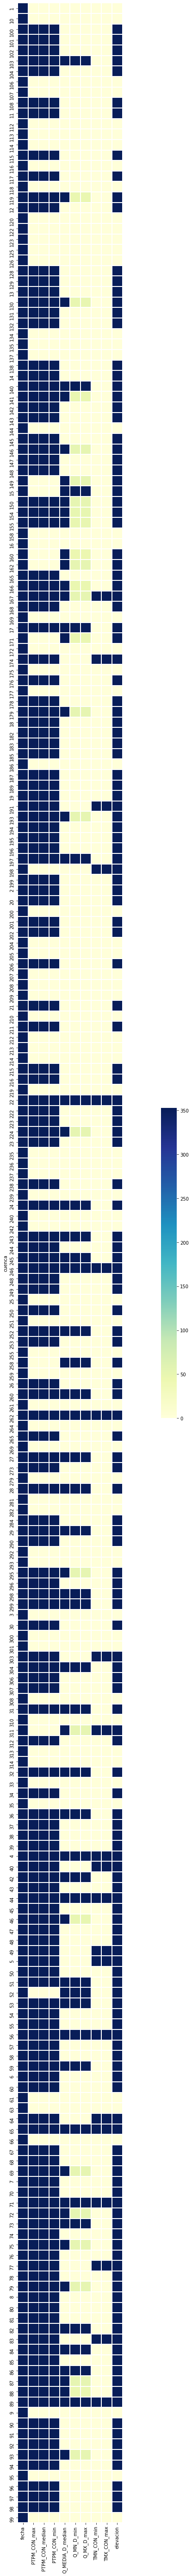

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,100))
ax = plt.axes()
#ax.set_title(f"{estacion_type} {variable_perfil} ({etiqueta_perfil})")
sns.heatmap(df2.reset_index().groupby('cuenca').count(),
    square = True,
    cbar_kws = {'fraction' : 0.02},
    cmap = 'YlGnBu',
    linewidth = 1,
    #annot = True, fmt = "d",
    ax = ax
   )
plt.show()
#plt.savefig(f"{data_base}\\{data_filename}_{etiqueta_perfil}_estacion_year.png")

In [35]:
#df.reset_index(inplace = True)
#df.set_index(['cuenca','fecha','codigo'], inplace = True)
df.drop(columns = ['tipo','elevacion','X','Y'], inplace = True)
#df.drop(columns = ['index'], inplace = True)
df.head()

,cuenca,fecha,codigo,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_median,Q_MN_D_min,Q_MX_D_max,TMN_CON_min,TMX_CON_max
0,199,1991-01-01,11010010,56.0,6.10,0.0,NaN,NaN,NaN,NaN,NaN
1,199,1991-02-01,11010010,125.4,2.25,0.0,NaN,NaN,NaN,NaN,NaN
2,199,1991-03-01,11010010,95.2,4.40,0.0,NaN,NaN,NaN,NaN,NaN
3,199,1991-04-01,11010010,88.4,2.05,0.0,NaN,NaN,NaN,NaN,NaN
4,199,1991-05-01,11010010,89.7,15.00,0.0,NaN,NaN,NaN,NaN,NaN


In [63]:
df[(df.cuenca == '197') & (df.fecha == '2000-03-01')]
#df[(df.PTPM_CON_max.notna()) & (df.Q_MEDIA_D_median.notna())]

,cuenca,fecha,codigo,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_median,Q_MN_D_min,Q_MX_D_max,TMN_CON_min,TMX_CON_max
816,197,2000-03-01,11035020,135.0,3.9,0.0,34.0,11.775,537.2,NaN,NaN
1169,197,2000-03-01,11037020,135.0,3.9,0.0,34.0,11.775,537.2,NaN,NaN
